<a href="https://colab.research.google.com/github/dasmiq/cs6200-hw1/blob/main/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

Name: Mansi Pravin Thanki

NUID: 002128043


This first homework assignment starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [1]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

zsh:1: no matches found: https://github.com/dasmiq/cs6200-hw1/blob/main/ap201001.json.gz?raw=true
gunzip: can't stat: ap201001.json.gz (ap201001.json.gz.gz): No such file or directory


We convert this file with one JSON record on each line to a list of dictionaries.

In [2]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [3]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [131]:
# TODO: Print the 6 terms from document APW_ENG_20100101.0001 with the highest count.
import pandas as pd
  
df = pd.DataFrame(terms)

items = df.loc[df['id']=='APW_ENG_20100101.0001']
highest_count_elements = items.groupby(['id','term']).sum().sort_values('count', ascending = False)

print("\nHighest count terms in document APW_ENG_20100101.0001 are as follows:\n\n",highest_count_elements[0:6])



Highest count terms in document APW_ENG_20100101.0001 are as follows:

                               count
id                    term         
APW_ENG_20100101.0001 a          16
                      the        11
                      to         10
                      brooks     10
                      of         10
                      and        10


In [132]:
# TODO: Print the 10 terms from all fields of document APW_ENG_20100102.0077 with the highest count.
# Group by Field and Terms 
# print(df)
item1 = df.loc[df['id']=='APW_ENG_20100102.0077']
output =(item1.sort_values('count',ascending = False).groupby('field').head(10))

print("\nHighest count terms from all fields in document APW_ENG_20100102.0077 are as follows:\n\n",output)


Highest count terms from all fields in document APW_ENG_20100102.0077 are as follows:

                          id  field       term  count
9604  APW_ENG_20100102.0077   body        the     50
9441  APW_ENG_20100102.0077   body         in     21
9615  APW_ENG_20100102.0077   body         to     21
9301  APW_ENG_20100102.0077   body        and     19
9502  APW_ENG_20100102.0077   body         of     14
9287  APW_ENG_20100102.0077   body          a     13
9642  APW_ENG_20100102.0077   body        was      8
9480  APW_ENG_20100102.0077   body  militants      8
9508  APW_ENG_20100102.0077   body         on      8
9558  APW_ENG_20100102.0077   body       said      8
9669  APW_ENG_20100102.0077  title     tribes      1
9668  APW_ENG_20100102.0077  title         to      1
9667  APW_ENG_20100102.0077  title    taliban      1
9666  APW_ENG_20100102.0077  title   pakistan      1
9665  APW_ENG_20100102.0077  title     attack      1
9664  APW_ENG_20100102.0077  title       anti      1
9663  APW_

In [133]:
# TODO: Print the 10 terms with the highest total count in the corpus.
import pandas as pd
  
df = pd.DataFrame(terms)
highest_corpus_count = df.groupby('term')['count'].sum().nlargest(10) 
print("\n The 10 terms with the highest total count in the corpus:\n\n", highest_corpus_count)



 The 10 terms with the highest total count in the corpus:

 term
the     62216
to      26931
in      25659
a       23383
of      22326
and     22125
said    10888
for      9716
on       9382
that     8942
Name: count, dtype: int64


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [134]:
# TODO: Compute the number of distinct documents in the collection.
N = 0
df = pd.DataFrame(terms)

N = df.id.value_counts().count()
print('Distinct documents in the collection are:',  N)


# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.

df = pd.DataFrame(terms)    

df1 = df.groupby(['term', 'id'], as_index = False).size()
df1.groupby(['term', 'id'], as_index = False).sum()

a = df1.term.value_counts()
print(a)




Distinct documents in the collection are: 2778
the          2696
in           2589
a            2571
of           2527
and          2521
             ... 
forfar          1
sheriffs        1
mazur           1
popescu's       1
dizziness       1
Name: term, Length: 27556, dtype: int64


In [135]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.

df = pd.DataFrame(terms)

the_items = df.loc[df['term']=='the']
print(the_items)

doc_count_with_the = the_items.id.value_counts().count()
print("\nNumber of documents containing 'the':\n", doc_count_with_the)

relative_document_frequency = doc_count_with_the/N
print("\nThe relative document frequency of 'the'is:\n",relative_document_frequency)


                           id field term  count
192     APW_ENG_20100101.0001  body  the     11
634     APW_ENG_20100102.0001  body  the     21
1269    APW_ENG_20100102.0002  body  the     71
1615    APW_ENG_20100102.0003  body  the     34
1779    APW_ENG_20100102.0005  body  the     14
...                       ...   ...  ...    ...
537571  APW_ENG_20100107.1062  body  the      6
537755  APW_ENG_20100107.1063  body  the     18
537945  APW_ENG_20100107.1064  body  the     18
538189  APW_ENG_20100107.1065  body  the     29
538284  APW_ENG_20100107.1067  body  the      5

[2724 rows x 4 columns]

Number of documents containing 'the':
 2696

The relative document frequency of 'the'is:
 0.9704823614110871


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [136]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.

# Document_1: temr1 term2 term3 term1 
# Document_2: term5, term1, term7, term9
    
# tfidf(term1,document1)    
# Count of t in d , Number of t in d 
# df(t) = occurrence of t in N documents - already computed earlier
# N number of documents 

import math
import numpy as np


df = pd.DataFrame(terms)
count_of_t_in_d = df.groupby(['id','term'], as_index = False).sum()

type(count_of_t_in_d)
count_of_t_in_d['Tf'] = np.log10(1+count_of_t_in_d['count']) 


df1 = df.groupby(['term', 'id'], as_index = False).size()
df1.groupby(['term', 'id'], as_index = False).sum()
a = df1.term.value_counts()
    
count_of_t_in_d['dft'] = count_of_t_in_d['term'].apply(lambda x:a[x] if x in a else 0)
count_of_t_in_d['idf'] = np.log10(N/count_of_t_in_d['dft'])
count_of_t_in_d['tfidf'] = count_of_t_in_d['Tf']*count_of_t_in_d['idf']
tfidf_terms = count_of_t_in_d
print(tfidf_terms)


                           id      term  count        Tf   dft       idf  \
0       APW_ENG_20100101.0001         a     16  1.230449  2571  0.033630   
1       APW_ENG_20100101.0001     about      1  0.301030  1077  0.411517   
2       APW_ENG_20100101.0001     abuse      1  0.301030    26  2.028759   
3       APW_ENG_20100101.0001   academy      1  0.301030    20  2.142702   
4       APW_ENG_20100101.0001   accused      2  0.477121   201  1.140536   
...                       ...       ...    ...       ...   ...       ...   
524173  APW_ENG_20100107.1067  tortured      1  0.301030    10  2.443732   
524174  APW_ENG_20100107.1067        us      1  0.301030   507  0.738724   
524175  APW_ENG_20100107.1067     video      1  0.301030    71  1.592474   
524176  APW_ENG_20100107.1067       who      1  0.301030  1267  0.340956   
524177  APW_ENG_20100107.1067     world      1  0.301030   510  0.736162   

           tfidf  
0       0.041380  
1       0.123879  
2       0.610717  
3       0.6

In [137]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.

#used sort_values to sort according to tfidf values in tfidf column

term_doc_highest_tfidf = count_of_t_in_d.sort_values('tfidf', ascending = False)
print(term_doc_highest_tfidf[0:20])

                           id         term  count        Tf  dft       idf  \
51457   APW_ENG_20100103.0028      guarani     24  1.397940    2  3.142702   
194072  APW_ENG_20100105.0061   nomination     95  1.982271   20  2.142702   
187419  APW_ENG_20100105.0014    greyhound     15  1.204120    1  3.443732   
228399  APW_ENG_20100105.0446      methane     15  1.204120    1  3.443732   
47700   APW_ENG_20100103.0015       kheire     14  1.176091    1  3.443732   
422318  APW_ENG_20100107.0036  shakespeare     18  1.278754    2  3.142702   
193987  APW_ENG_20100105.0061        guild     28  1.462398    6  2.665581   
333804  APW_ENG_20100106.0428  shakespeare     16  1.230449    2  3.142702   
20658   APW_ENG_20100102.0197      elkhart     12  1.113943    1  3.443732   
297736  APW_ENG_20100106.0075        magna     12  1.113943    1  3.443732   
415473  APW_ENG_20100106.1325       sutton     21  1.342423    4  2.841672   
508776  APW_ENG_20100107.0928       minhas     11  1.079181    1

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [138]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.

df = pd.DataFrame(terms)
# using group by to sum up the 
s = df.groupby('term',as_index=False).sum().sort_values('count', ascending = 0)

frequency = []
frequency = s.values.tolist() #converting to list

print(frequency)

[['the', 62216], ['to', 26931], ['in', 25659], ['a', 23383], ['of', 22326], ['and', 22125], ['said', 10888], ['for', 9716], ['on', 9382], ['that', 8942], ['was', 7791], ['is', 6317], ['with', 6283], ['at', 6078], ['he', 5874], ['it', 5357], ['from', 5094], ['as', 4746], ['by', 4641], ['has', 4355], ['an', 4087], ['have', 4012], ['his', 3904], ['be', 3693], ['but', 3638], ['s', 3567], ['u', 3518], ['were', 3478], ['not', 3320], ['are', 3218], ['will', 3063], ['its', 2955], ['who', 2904], ['had', 2900], ['after', 2876], ['year', 2816], ['they', 2423], ['this', 2331], ['new', 2263], ['been', 2241], ['more', 2225], ['two', 2136], ['security', 2097], ['or', 2076], ['which', 2059], ['about', 2003], ['percent', 1966], ['up', 1917], ['their', 1898], ['al', 1897], ['would', 1851], ['also', 1826], ['last', 1807], ['first', 1761], ['than', 1748], ['i', 1722], ['one', 1717], ['other', 1680], ['people', 1678], ['out', 1677], ['government', 1659], ['officials', 1628], ['over', 1626], ['when', 1622],

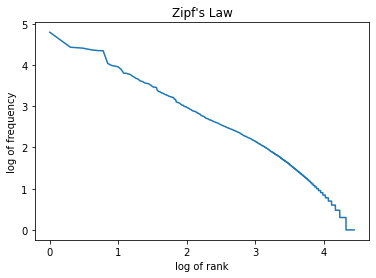

In [139]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

import matplotlib.pyplot as plt
import numpy as np

# for key, value in frequency:
d2 = [item[1] for item in frequency]
plt.title("Zipf's Law")
plt.ylabel('log of frequency') #set the label for y axis
plt.xlabel('log of rank') #set the label for x-axis
plt.plot(np.log10(range(1, len(d2) + 1)), np.log10(d2)) #plotting log of rank against log of frequency
plt.show()



In [140]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.

d3 = [item[1] for item in frequency]
no_of_tokens = sum(d3)
print(no_of_tokens)
ntokens = 0

1000000


In [141]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.

#top 10 words
freq_ten_tokens = df.groupby('term')['count'].sum().nlargest(10)
print("\nThe top 10 most frequent words are:\n", freq_ten_tokens)

#summing up tokens
sum_of_tokens = sum(freq_ten_tokens)
print("\nThe sum of tokens made up by the top 10 most frequent words:\n", sum_of_tokens)

#calculating proportion
prop = sum_of_tokens/no_of_tokens
print("\nThe proportion of tokens made up by the top 10 most frequent words:\n", prop)


The top 10 most frequent words are:
 term
the     62216
to      26931
in      25659
a       23383
of      22326
and     22125
said    10888
for      9716
on       9382
that     8942
Name: count, dtype: int64

The sum of tokens made up by the top 10 most frequent words:
 221568

The proportion of tokens made up by the top 10 most frequent words:
 0.221568


In [142]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.

sum1 = 0

# for all tokens having frequency 1:
for item1 in frequency:
    if item1[1]==1:
        sum1+=item1[1]
        
#calculating proportion
prop2 = sum1/no_of_tokens
print("\nThe proportion of tokens made up by the words that occur exactly once in this collection: \n", prop2)


The proportion of tokens made up by the words that occur exactly once in this collection: 
 0.006641


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll briefly explore acquiring new data.

Find a collection of documents that you're interested in. For the statistics to be meaningful, this collection should have at least 1,000 words.

The format could be anything you can extract text from: HTML, PDF, MS PowerPoint, chat logs, etc.

The collection should be in a natural language, not mostly code or numerical data. It could be in English or in any other language.

The final project for this course will involve designing an information retrieval task on some dataset. You could use this exercise to think about what kind of data you might be interested in, although that is not required.

**TODO**: Write code to download and extract the text from the collection. Describe choices you make about what contents to keep.

In [143]:
# TODO: Data acquisition code here.

print("\nText data from the title and body of the article is our main data to be worked on\n")
print("\nURL is initially used to download the content and use it as index for initial pandas dataframe\n")


import pandas as pd
import newspaper
from newspaper import Article
import os
import re
import collections

url_links = ("https://www.sfgate.com/bayarea/article/San-Francisco-man-stranded-Muir-Beach-16839766.php",
"http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html",
"https://www.nydailynews.com/new-york/nyc-crime/ny-senior-kicked-brooklyn-nypd-20220207-le2f4yv6xfhpxjxdrbwly2x2qu-story.html",
"https://www.bostonglobe.com/2022/02/07/metro/wu-cassellius-departure-is-challenge-an-opportunity/",
"http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011",
"http://www.nasdaq.com/article/plosser-fed-may-have-to-accelerate-tapering-pace-20140310-00371",
"http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp",
"http://www.fxstreet.com/news/forex-news/article.aspx\?storyid=23285020-b1b5-47ed-a8c4-96124bb91a39",
"https://www.bostonglobe.com/business/technology/?p1=BGHeader_MainNav",
"https://www.boston.com/",
"https://www.bostonglobe.com/science/environment/climate/?p1=BGHeader_MainNav",
"https://www.bostonglobe.com/metro/education/k-12/education-project/?p1=BGHeader_MainNav")

cols = ['Title','Body']
docs = pd.DataFrame(columns=cols, index=url_links)

for link in url_links:
    print("Downloading from..",link)
    article = Article(link)
    article.download()
    article.parse()
    docs.loc[link].Title = article.title
    docs.loc[link].Body = article.text
    

print ("Done downloading ... ")





Text data from the title and body of the article is our main data to be worked on


URL is initially used to download the content and use it as index for initial pandas dataframe

Done downloading ... 


**TODO**: Write code to tokenize the text and count the resulting terms in each document. Describe your tokenization approach here.

Each term may also be associated with a field, such as `body` and `title` in the newswire collection above. Describe the different fields in your data.

In [144]:
# TODO: Tokenization code here.

print("\nFields in the data:\n link: this acts as identifier of the document article\n term: the lower-cased term extracted from article;\n type: analogous to field column: term present in body and title region of the document\n count: with the number of times each term occurred in that field and document article.") 

print("\n Used regular expression (re) - [to remove special characters] and split() on the text content in body and title to generate tokens\n created new pandas dataframe\n used collections.Counter to keep count of tokens in each document\n\n")

processed_df = pd.DataFrame(columns = ['link', 'term','type','count'])
for i in range(len(docs)):
    bw = re.sub("[^\w' ]", "", docs.iloc[i].Body.lower()).split()
    bw_counts = collections.Counter(bw)
    for keys in bw_counts:
        processed_df = processed_df.append({'link' : 'doc'+str(i), 'term' : keys, 'type' : 'body', 'count':bw_counts[keys]}, ignore_index = True)
    
    s = re.sub("[^\w' ]", "", docs.iloc[i].Title.lower()).split()
    s_counts = collections.Counter(s)
    for keys in s_counts:
        processed_df = processed_df.append({'link' : 'doc'+str(i), 'term' : keys, 'type' : 'title', 'count':s_counts[keys]}, ignore_index = True)
            
    
print(processed_df)


Fields in the data:
 link: this acts as identifier of the document article
 term: the lower-cased term extracted from article;
 type: analogous to field column: term present in body and title region of the document
 count: with the number of times each term occurred in that field and document article.

 Used regular expression (re) - [to remove special characters] and split() on the text content in body and title to generate tokens
 created new pandas dataframe
 used collections.Counter to keep count of tokens in each document


       link         term   type count
0      doc0       latest   body     1
1      doc0          feb   body     1
2      doc0            8   body     1
3      doc0           10   body     1
4      doc0           am   body     1
...     ...          ...    ...   ...
1488  doc11          and  title     1
1489  doc11  opportunity  title     1
1490  doc11           in  title     1
1491  doc11       boston  title     1
1492  doc11      schools  title     1

[1493 r

In [145]:
frequency =  processed_df.groupby('term')['count'].sum()#.sort_values('count', ascending = False)
frequency = frequency.sort_values(ascending = False)

print(frequency)

term
the            167
of              67
to              64
in              63
a               62
              ... 
help             1
helping          1
herself          1
highprofile      1
łódź             1
Name: count, Length: 1064, dtype: object


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above. What do you observe about the differences between the distributions in these two collections?

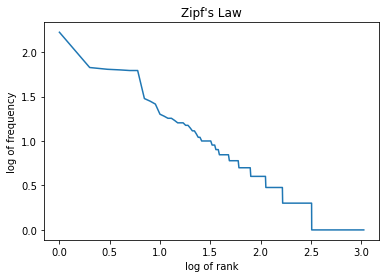


Observations:
The rank-frequency distribution for both the collections showcase the inverse relation.
However, the distribution for the sample collection is much more smoother than the second collection. 


In [146]:
import matplotlib.pyplot as plt
import numpy as np

freq = [item for item in frequency]

plt.title("Zipf's Law")
plt.ylabel('log of frequency') #set the label for y axis
plt.xlabel('log of rank') #set the label for x-axis
plt.plot(np.log10(range(1, len(freq) + 1)), np.log10(freq))  #plotting log of rank against log of frequency
plt.show()

print ("\nObservations:\nThe rank-frequency distribution for both the collections showcase the inverse relation.\nHowever, the distribution for the sample collection is much more smoother than the second collection. ")
